# Bar graph 
Abbiamo deciso di presentare con un grafico di barre orizzontali la quantità di donne e uomini laureati in materie STEM in un determinato anno in diverse nazioni del mondo (5 paesi rappresentativi ognuno del proprio continente).
Questa analisi viene fatto per 5 anni diversi: 2013, 2015, 2017, 2019, 2021.

In [1]:
from collections import defaultdict
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
with open('laureati_nel_mondo_field.csv', 'r') as data_file:
  data_reader = csv.reader(data_file, delimiter =',', quotechar ='"')
  data = list(data_reader)[1:]

data = pd.read_csv('laureati_nel_mondo_field.csv', sep=',', index_col=0)
data = data.reset_index()

sdata = data[['Country', 'SEX', 'Field', 'Education level', 'Year', 'Value']]

scdata = sdata.dropna(subset=['Value'])
scdata['Country'].unique() #lista dei paesi presenti nel database

array(['Slovenia', 'Canada', 'United States', 'Chile', 'Brazil', 'Korea',
       'Finland', 'Latvia', 'France', 'Switzerland', 'Luxembourg',
       'Israel', 'Italy', 'Czechia', 'New Zealand', 'Slovak Republic',
       'Spain', 'Lithuania', 'Ireland', 'Hungary', 'Belgium', 'Germany',
       'Iceland', 'Colombia', 'Portugal', 'United Kingdom', 'Norway',
       'Greece', 'Estonia', 'Poland', 'Denmark', 'Sweden', 'Türkiye',
       'Japan', 'Netherlands', 'Australia', 'Austria', 'Mexico',
       'Croatia', 'Romania', 'Costa Rica', 'Bulgaria'], dtype=object)

Da questa lista abbiamo scelto come paesi rappresentati gli Stati Uniti, il Brasile, l'Italia, il Giappone e l'Australia.

## 2013

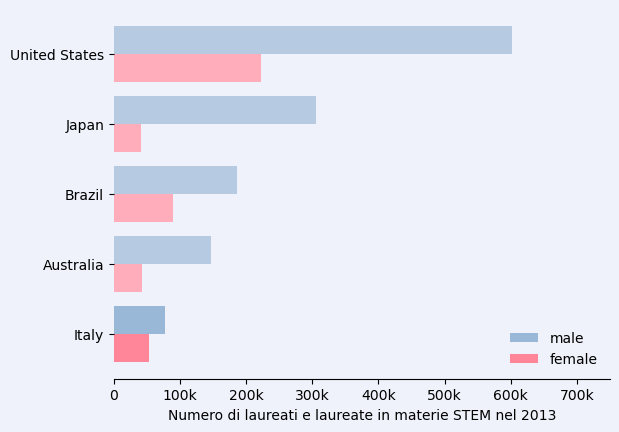

In [3]:
NMS = sdata[sdata['Field'] == "Natural sciences, mathematics and statistics"]
ICT = sdata[sdata['Field'] == "Information and Communication Technologies (ICTs)"]
EMC = sdata[sdata['Field'] == "Engineering, manufacturing and construction"]

STEMdata = pd.concat([NMS, ICT, EMC])
STEMdata = STEMdata.groupby(['Country', 'SEX', 'Year'])['Value'].sum()


STEMdata = STEMdata.reset_index()

STEMdata13 = (STEMdata[STEMdata['Year'] == 2013])
STEMdata15 = (STEMdata[STEMdata['Year'] == 2015])
STEMdata17 = (STEMdata[STEMdata['Year'] == 2017])
STEMdata19 = (STEMdata[STEMdata['Year'] == 2019])
STEMdata21 = (STEMdata[STEMdata['Year'] == 2021])

STEMdata5 = pd.concat([STEMdata13, STEMdata15, STEMdata17, STEMdata19, STEMdata21])

STEMdata5IT = STEMdata5[STEMdata5['Country'] == 'Italy']
STEMdata5US = STEMdata5[STEMdata5['Country'] == 'United States']
STEMdata5BR = STEMdata5[STEMdata5['Country'] == 'Brazil']
STEMdata5JP = STEMdata5[STEMdata5['Country'] == 'Japan']
STEMdata5AU = STEMdata5[STEMdata5['Country'] == 'Australia']

STEMdata51 = pd.concat([STEMdata5IT, STEMdata5US, STEMdata5BR, STEMdata5JP, STEMdata5AU])

STEMdata513 = STEMdata51.query('Year == 2013')
f =STEMdata513[STEMdata513['SEX']=='F']
m = STEMdata513[STEMdata513['SEX']=='M']
m = m.sort_values(by = ['Value']) #sort delle barre

plt.figure(facecolor='#EFF2FA')
ax = plt.axes()
ax.set_facecolor("#EFF2FA")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.barh(y = m['Country'], width=m['Value'], color = ['#99B7D6'if c == 'Italy' else '#B6CBE2' for c in m['Country']], align = 'edge', height= 0.4, tick_label=m['Year'])
plt.barh(y = f['Country'], width=f['Value'], color =['#FF8599'if c == 'Italy' else '#FFADBA' for c in f['Country']], align = 'edge', height= -0.4, tick_label=f['Year'])

plt.yticks([r for r in range(len(f['Country']))], m['Country'])
plt.xlim(0, 750000)
plt.xticks(ticks= [0, 100000,200000, 300000, 400000, 500000, 600000, 700000], labels = [0, '100k','200k', '300k', '400k', '500k', '600k', '700k'])
plt.xlabel("Numero di laureati e laureate in materie STEM nel 2013")


legend = plt.legend(['male','female'])
legend.get_frame().set_facecolor('#EFF2FA')
legend.get_frame().set_linewidth(0)

## 2015

Text(0.5, 0, 'Numero di laureati e laureate in materie STEM nel 2015')

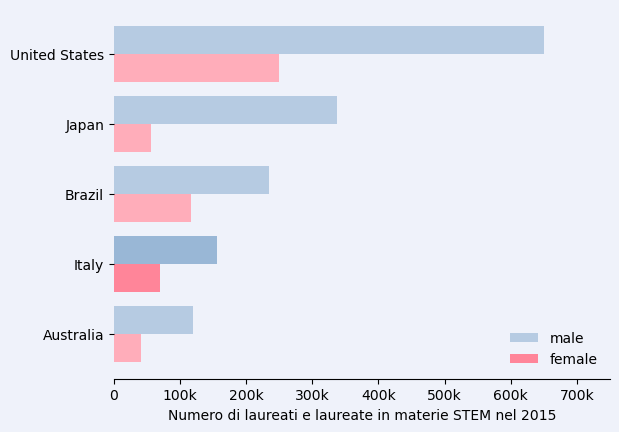

In [4]:
STEMdata513 = STEMdata51.query('Year == 2015')
f =STEMdata513[STEMdata513['SEX']=='F']

m = STEMdata513[STEMdata513['SEX']=='M']
m = m.sort_values(by = ['Value'])

plt.figure(facecolor='#EFF2FA')
ax = plt.axes()
ax.set_facecolor("#EFF2FA")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.barh(y = m['Country'], width=m['Value'], color = ['#99B7D6'if c == 'Italy' else '#B6CBE2' for c in m['Country']], align = 'edge', height= 0.4, tick_label=m['Year'])
plt.barh(y = f['Country'], width=f['Value'], color =['#FF8599'if c == 'Italy' else '#FFADBA' for c in f['Country']], align = 'edge', height= -0.4, tick_label=f['Year'])

plt.yticks([r for r in range(len(f['Country']))], m['Country'])
plt.xlim(0, 750000)
plt.xticks(ticks= [0, 100000,200000, 300000, 400000, 500000, 600000, 700000], labels = [0, '100k','200k', '300k', '400k', '500k', '600k', '700k'])
legend = plt.legend(['male','female'])
legend.get_frame().set_facecolor('#EFF2FA')
legend.get_frame().set_linewidth(0)
plt.xlabel("Numero di laureati e laureate in materie STEM nel 2015")

## 2017

Text(0.5, 0, 'Numero di laureati e laureate in materie STEM nel 2017')

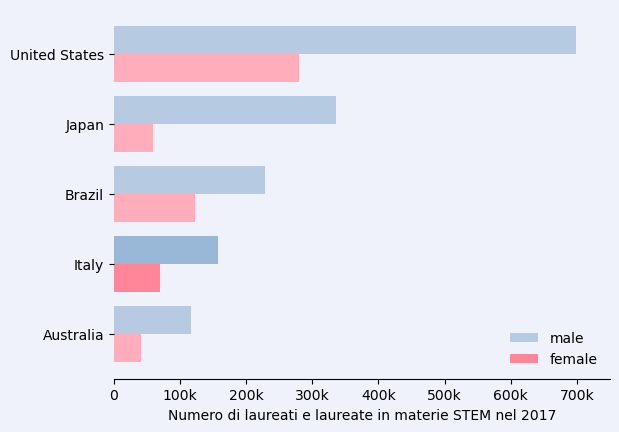

In [5]:
STEMdata513 = STEMdata51.query('Year == 2017')
f =STEMdata513[STEMdata513['SEX']=='F']
m = STEMdata513[STEMdata513['SEX']=='M']
m = m.sort_values(by = ['Value'])

plt.figure(facecolor='#EFF2FA')
ax = plt.axes()
ax.set_facecolor("#EFF2FA")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.barh(y = m['Country'], width=m['Value'], color = ['#99B7D6'if c == 'Italy' else '#B6CBE2' for c in m['Country']], align = 'edge', height= 0.4, tick_label=m['Year'])
plt.barh(y = f['Country'], width=f['Value'], color =['#FF8599'if c == 'Italy' else '#FFADBA' for c in f['Country']], align = 'edge', height= -0.4, tick_label=f['Year'])


plt.yticks([r for r in range(len(f['Country']))], m['Country'])
plt.xlim(0, 750000)
plt.xticks(ticks= [0, 100000,200000, 300000, 400000, 500000, 600000, 700000], labels = [0, '100k','200k', '300k', '400k', '500k', '600k', '700k'])
legend = plt.legend(['male','female'])
legend.get_frame().set_facecolor('#EFF2FA')
legend.get_frame().set_linewidth(0)
plt.xlabel("Numero di laureati e laureate in materie STEM nel 2017")

## 2019

Text(0.5, 0, 'Numero di laureati e laureate in materie STEM nel 2019')

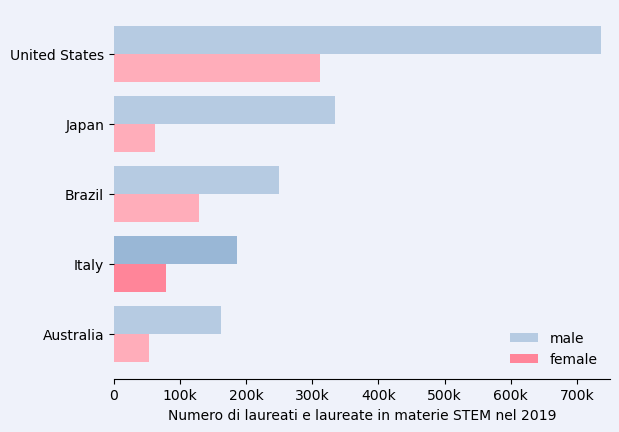

In [6]:
STEMdata513 = STEMdata51.query('Year == 2019')
f =STEMdata513[STEMdata513['SEX']=='F']
#f = f.sort_values(by = ['Value'])

plt.figure(facecolor='#EFF2FA')
ax = plt.axes()
ax.set_facecolor("#EFF2FA")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

m = STEMdata513[STEMdata513['SEX']=='M']
m = m.sort_values(by = ['Value'])
plt.barh(y = m['Country'], width=m['Value'], color = ['#99B7D6'if c == 'Italy' else '#B6CBE2' for c in m['Country']], align = 'edge', height= 0.4, tick_label=m['Year'])
plt.barh(y = f['Country'], width=f['Value'], color =['#FF8599'if c == 'Italy' else '#FFADBA' for c in f['Country']], align = 'edge', height= -0.4, tick_label=f['Year'])   


plt.yticks([r for r in range(len(f['Country']))], m['Country'])
plt.xlim(0, 750000)
plt.xticks(ticks= [0, 100000,200000, 300000, 400000, 500000, 600000, 700000], labels = [0, '100k','200k', '300k', '400k', '500k', '600k', '700k'])

legend = plt.legend(['male','female'])
legend.get_frame().set_facecolor('#EFF2FA')
legend.get_frame().set_linewidth(0)
plt.xlabel("Numero di laureati e laureate in materie STEM nel 2019")

## 2021

Text(0.5, 0, 'Numero di laureati e laureate in materie STEM nel 2021')

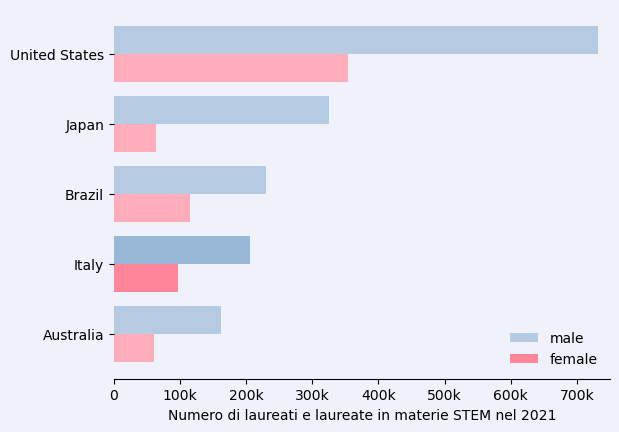

In [7]:
STEMdata513 = STEMdata51.query('Year == 2021')
f =STEMdata513[STEMdata513['SEX']=='F']
#f = f.sort_values(by = ['Value'])
m = STEMdata513[STEMdata513['SEX']=='M']
m = m.sort_values(by = ['Value'])

plt.figure(facecolor='#EFF2FA')
ax = plt.axes()
ax.set_facecolor("#EFF2FA")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.barh(y = m['Country'], width=m['Value'], color = ['#99B7D6'if c == 'Italy' else '#B6CBE2' for c in m['Country']], align = 'edge', height= 0.4, tick_label=m['Year'])
plt.barh(y = f['Country'], width=f['Value'], color =['#FF8599'if c == 'Italy' else '#FFADBA' for c in f['Country']], align = 'edge', height= -0.4, tick_label=f['Year'])   


plt.yticks([r for r in range(len(f['Country']))], m['Country'])

plt.xlim(0, 750000)
plt.xticks(ticks= [0, 100000,200000, 300000, 400000, 500000, 600000, 700000], labels = [0, '100k','200k', '300k', '400k', '500k', '600k', '700k'])

legend = plt.legend(['male','female'])
legend.get_frame().set_facecolor('#EFF2FA')
legend.get_frame().set_linewidth(0)
plt.xlabel("Numero di laureati e laureate in materie STEM nel 2021")

# Bar graph globale
Per comparare la situazione di tutti i paesi presenti nel data frame alla data più recente abbiamo deciso di elaborare un bar graph con le parcentuali di donne laureate in STEM rispetto al totale di persone, donne e uomini, laureate in STEM.

C:\Users\ruiza\AppData\Local\Temp\ipykernel_9308\3457448224.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=STEMdataPerF['Country'],rotation=90)
C:\Users\ruiza\AppData\Local\Temp\ipykernel_9308\3457448224.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=['0%', '5%', '10%', '15%','20%', '25%','30%', '35%','40%'])


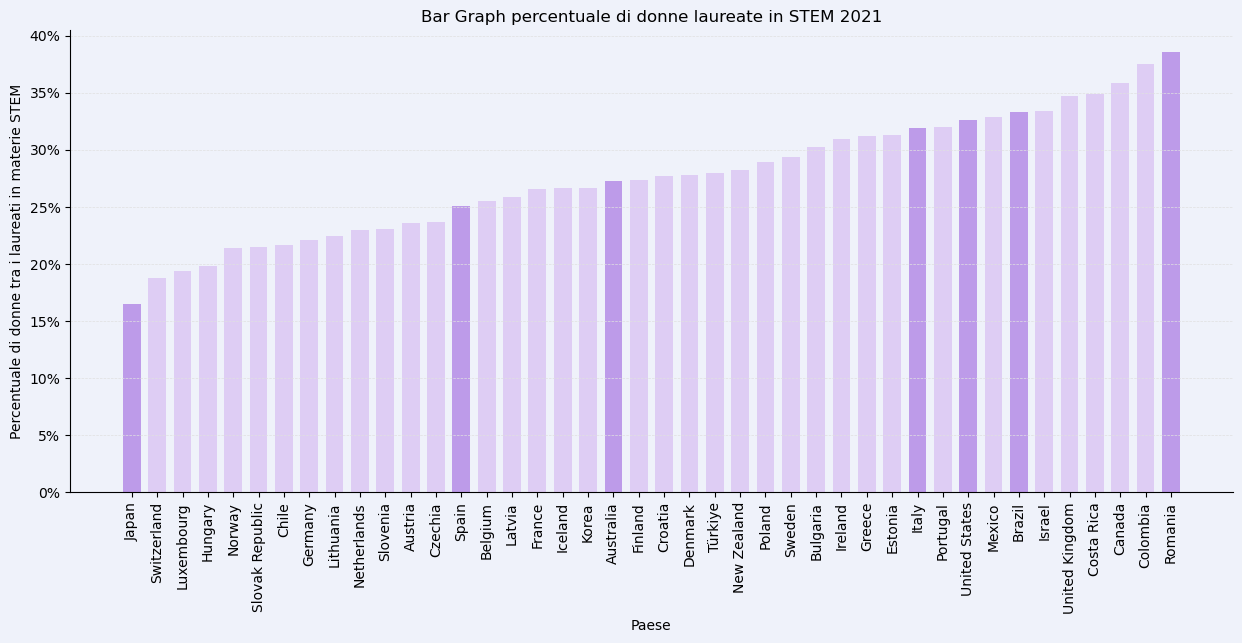

In [8]:
STEMdata21 = STEMdata21.groupby(['Country','SEX', 'Year'])['Value'].sum()
STEMdata21 = STEMdata21.reset_index()

STEMdata21
STEMdataT = STEMdata21.groupby(['Country','Year'])['Value'].sum()

STEMdataT = STEMdataT.reset_index()
STEMdataT = STEMdataT.rename(columns={'Value': 'Total'})

STEMdata21F = STEMdata21.query('SEX == "F"').reset_index()
STEMdata21FF = STEMdata21F

STEMdata21F = pd.concat([STEMdata21F, STEMdataT['Total']], axis = 1, ignore_index=False, verify_integrity=True)

STEMdata21F = STEMdata21F.rename(columns={0: 'Country'})
STEMdata21F = STEMdata21F.rename(columns={1: 'SEX'})
STEMdata21F = STEMdata21F.rename(columns={2: 'Year'})
STEMdata21F = STEMdata21F.rename(columns={3: 'Value'})
STEMdata21F = STEMdata21F.rename(columns={4: 'Total'})
STEMdataPerF = STEMdata21F

STEMdataPerF['Percentage'] = (STEMdata21F['Value'] / STEMdata21F['Total']) * 100

STEMdataPerF = STEMdataPerF.sort_values(by=['Percentage'])

fig, ax = plt.subplots(1, 1, figsize=(15, 6), facecolor='#EFF2FA')
ax.set_facecolor("#EFF2FA")
plt.grid(axis='y', color = '#E0E0E0', linestyle = '--', linewidth = 0.5)
ax.bar(x=STEMdataPerF['Country'], height=STEMdataPerF['Percentage'], width = 0.7, 
       color =['#BD9BE9' if (c == 'Italy' or c == 'Japan' or c == 'Romania' or c == 'United States' or c == 'Brazil' or c == 'Australia' or c == 'Spain')
                else '#DECDF4' for c in STEMdataPerF['Country']])


ax.set_xticklabels(labels=STEMdataPerF['Country'],rotation=90)
ax.set_yticklabels(labels=['0%', '5%', '10%', '15%','20%', '25%','30%', '35%','40%'])
ax.set_title('Bar Graph percentuale di donne laureate in STEM 2021')
ax.set_xlabel('Paese')
ax.set_ylabel('Percentuale di donne tra i laureati in materie STEM')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()